In [187]:
#Importing our dataset from csv file
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import graphviz
from matplotlib import pyplot as plt


df=pd.read_csv("titanic-passengers.csv", sep=";")
names= df["Survived"].unique()
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [188]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
#Preprocessing our data
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)
df.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)


In [190]:
x = df[["Age","Sex","Pclass"]]
y = df[["Survived"]]

In [191]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [192]:

#applying tree algorithm
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))


Accuracy :  0.8044692737430168


In [193]:
'''ax = tree.export_graphviz(model , out_file=None)
graph = graphviz.Source(ax)

graph.render("df")
graph'''

'ax = tree.export_graphviz(model , out_file=None)\ngraph = graphviz.Source(ax)\n\ngraph.render("df")\ngraph'

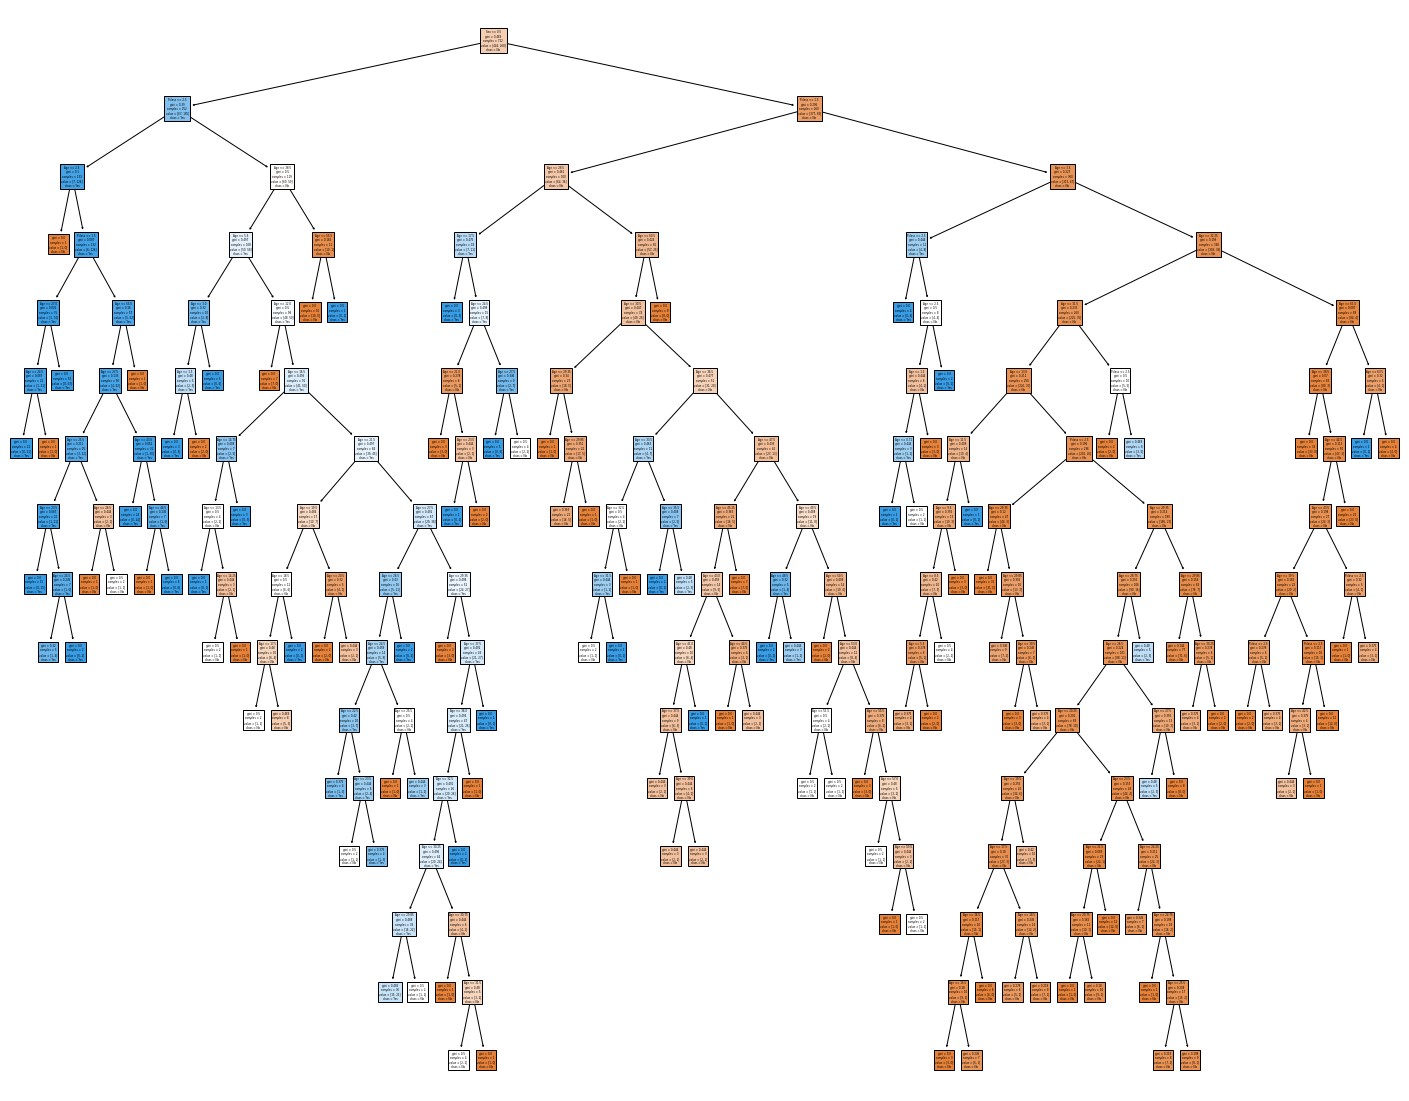

In [195]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=x.columns,  
                   class_names=names,
                   filled=True)

In [196]:
model_1 = tree.DecisionTreeClassifier(criterion="gini" , splitter= 'random',max_leaf_nodes=6,max_depth=3)  
model_1.fit(x_train, y_train)
y_pred=model_1.predict(x_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.770949720670391


in this case we have the same accuracy

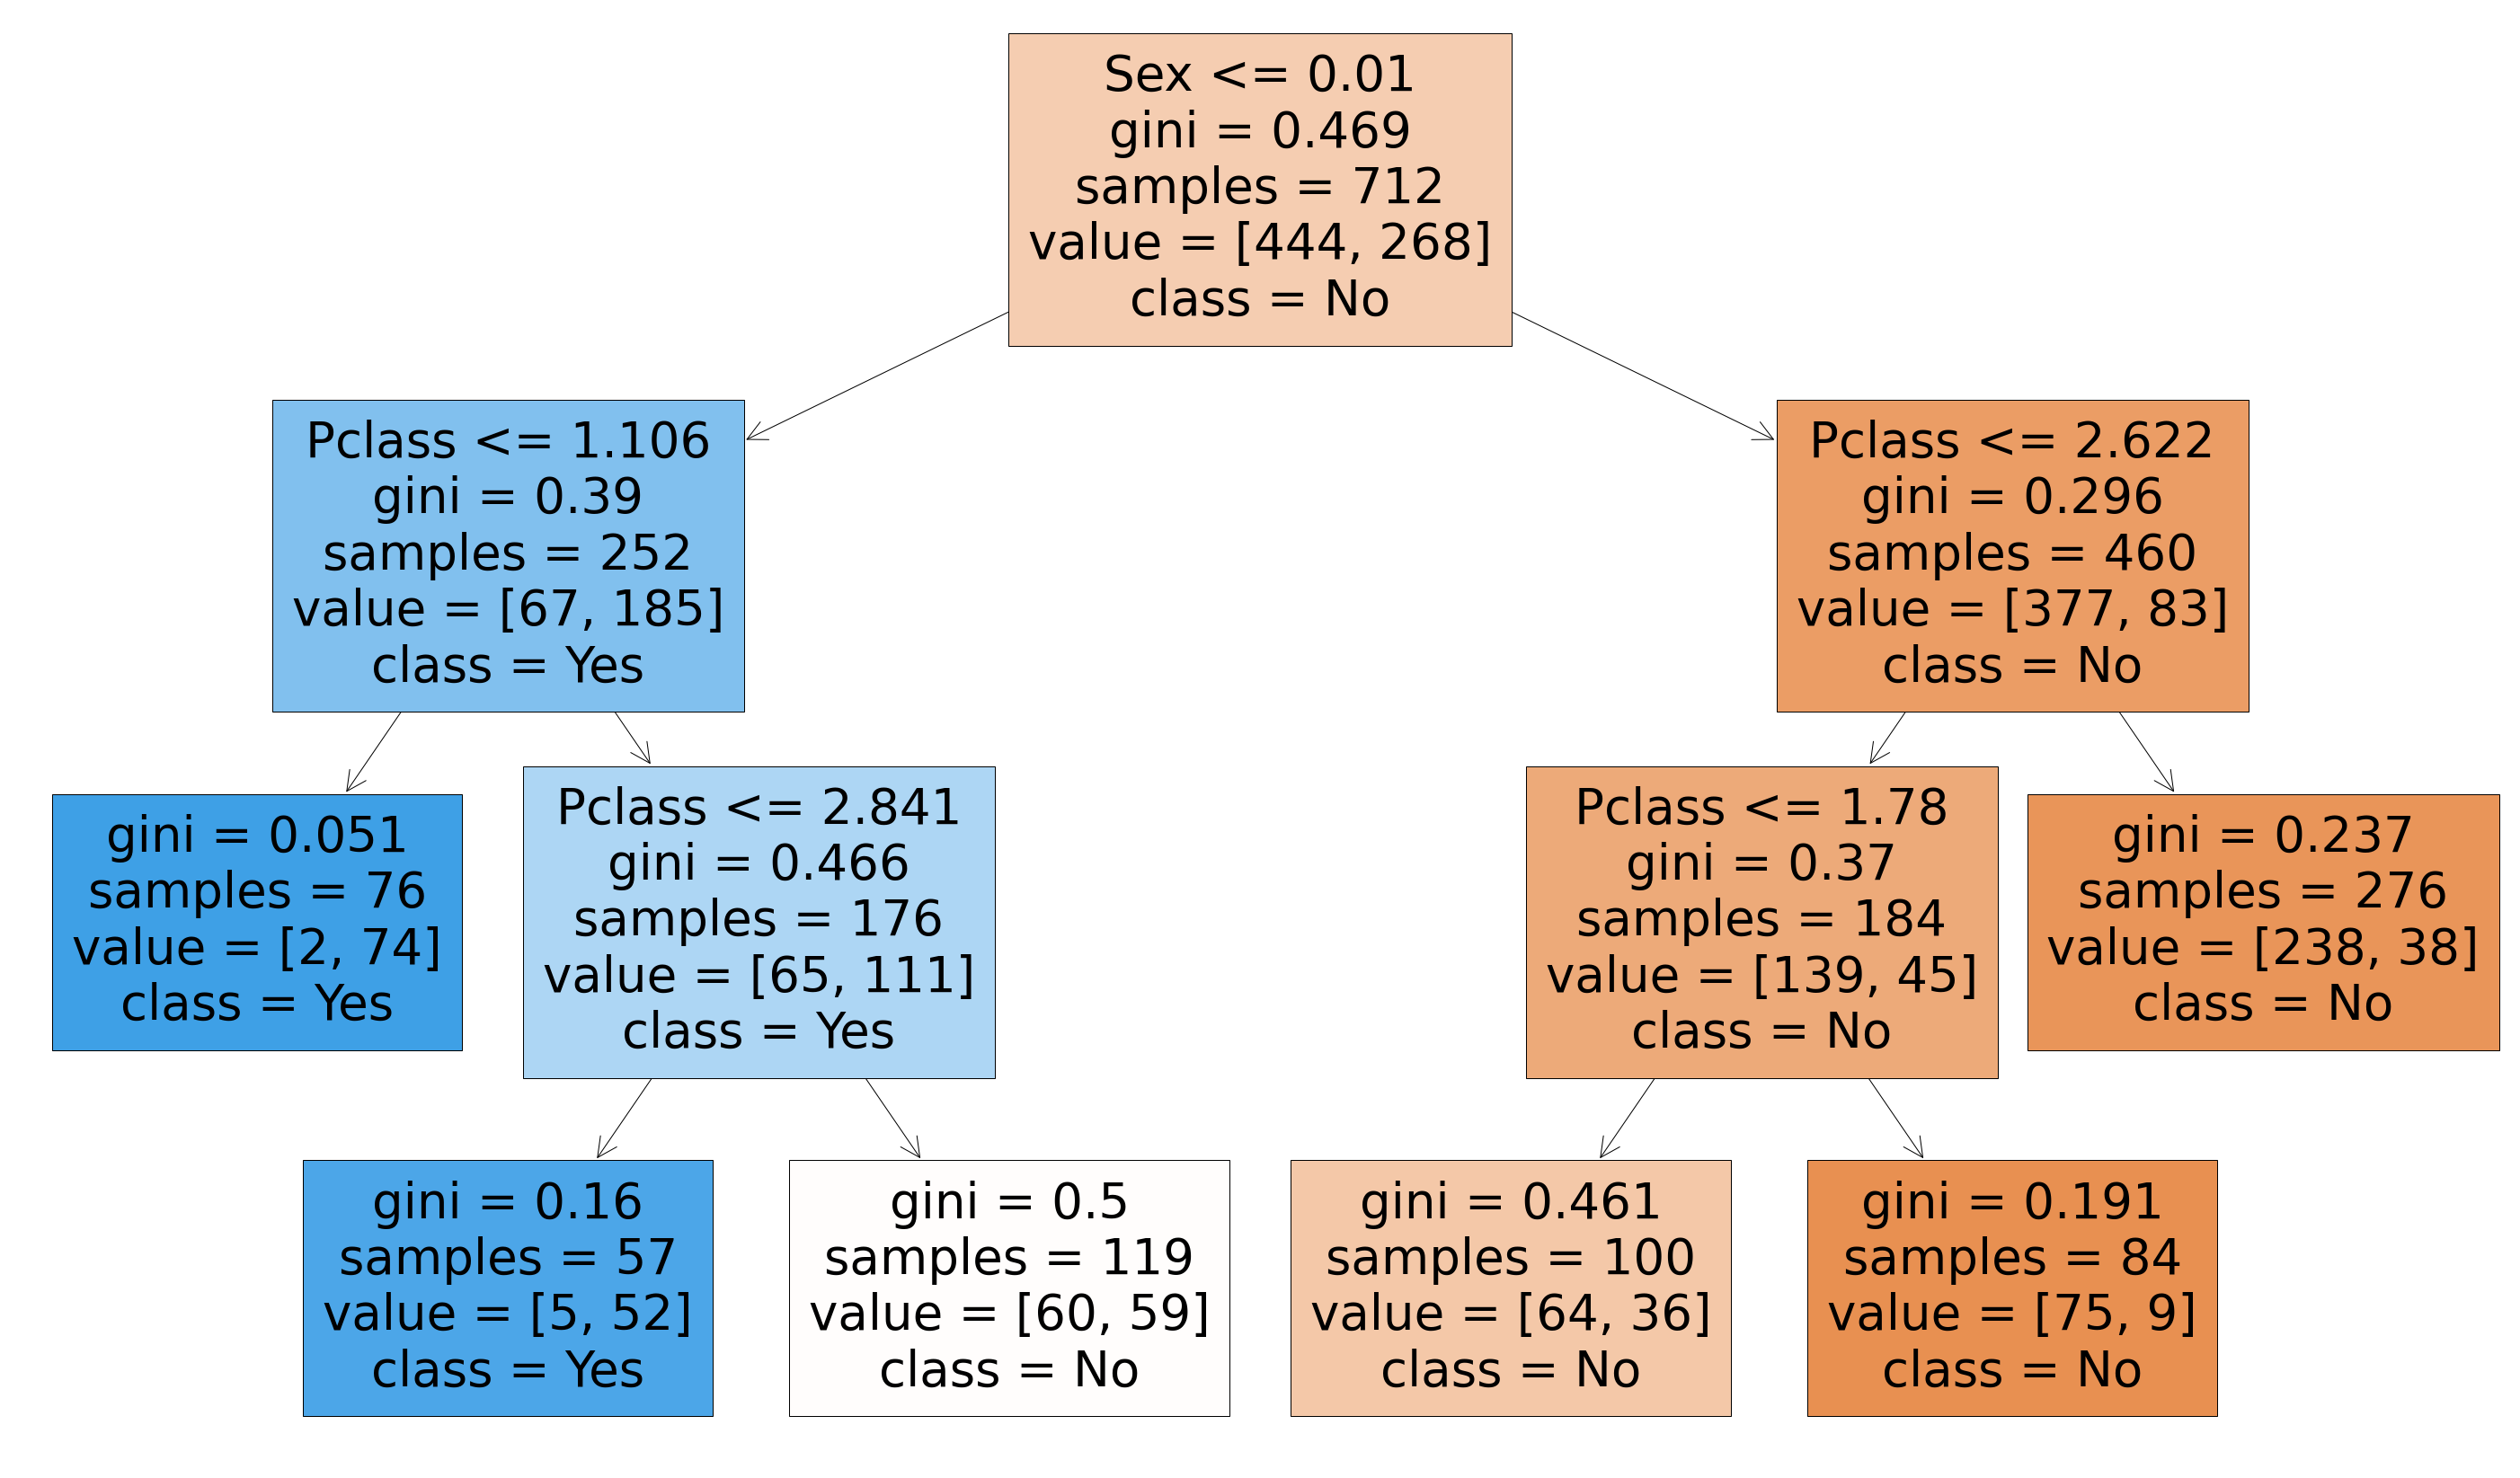

In [197]:
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model_1, 
                   feature_names=x.columns,  
                   class_names=names,
                   filled=True)

# Random Forest 

In [203]:
model_rf=RandomForestClassifier(n_estimators=100)  
model_rf.fit(x_train, y_train.values.ravel())
y_pred=model_rf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877
